In [20]:
# Importamos las librerías necesarias

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

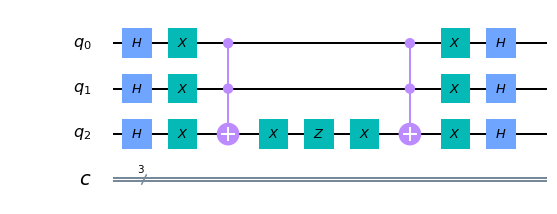

In [21]:
# Implementamos la puerta de Grover

Grover = QuantumCircuit(3,3)

Grover.h(range(3))
Grover.x(range(3))

Grover.mct(range(2),2,0) # esto es el cccx, el primer parámetro indica los qubits de control, el segundo
                         # el qubit objetivo. Finalmente poned un cero, no deis importancia a ese valor
Grover.x(2)
Grover.z(2)
Grover.x(2)
Grover.mct(range(2),2,0)

Grover.x(range(3))
Grover.h(range(3))

Grover.draw(output = "mpl")

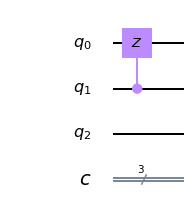

In [22]:
# Esta es la función que podeis cambiar para buscar nuevos elementos

Detector = QuantumCircuit(3,3)

Detector.cz(1,0)
Detector.draw(output = "mpl")

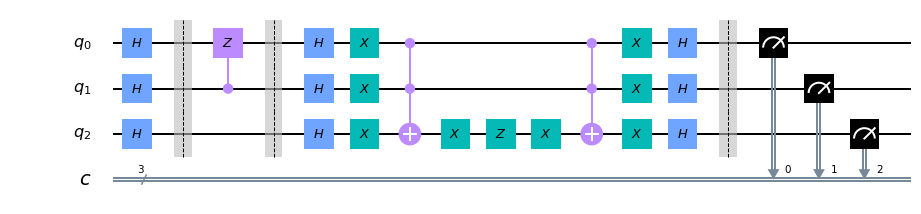

In [23]:
circ = QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
circ = circ + Detector
circ.barrier(range(3))
circ = circ + Grover
circ.barrier(range(3))
circ.measure(range(3), range(3))
circ.draw(output = "mpl")

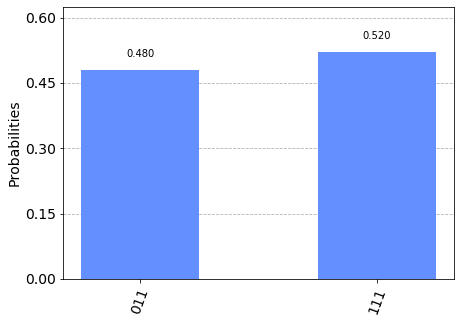

In [24]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)